In [90]:
"""In this notebook, I analysed the time frames measurmented data"""

"""notebook settings"""
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['axes.grid'] = True
print(f'GPU AVAILABLE: {tf.test.is_gpu_available()}')

"""read data from file"""
air_pollution = pd.read_csv('air_pollution_smog.csv')
air_pollution = air_pollution.rename(columns={'date':'datetime'})
air_pollution.pop('entry_id')
air_pollution_with_month = air_pollution

GPU AVAILABLE: True


In [91]:
"""convert values from datetime columnn to datetime type"""
air_pollution['datetime'] = pd.to_datetime(air_pollution['datetime'])
air_pollution_with_month['Date'] = pd.to_datetime(air_pollution_with_month['datetime'], errors='coerce')
air_pollution.head()


,datetime,PM1,PM2.5,PM10,temp,pressure,humidity,Date
0,2021-11-12 20:30:17+01:00,0.0,0.0,0.0,26.47,1022.04517,39.31152,2021-11-12 20:30:17+01:00
1,2021-11-12 20:30:35+01:00,22.0,33.0,38.0,26.67,1022.39905,39.24609,2021-11-12 20:30:35+01:00
2,2021-11-12 20:30:52+01:00,23.0,35.0,44.0,26.69,1022.33557,39.18848,2021-11-12 20:30:52+01:00
3,2021-11-12 20:31:10+01:00,25.0,39.0,48.0,26.71,1022.28021,39.74805,2021-11-12 20:31:10+01:00
4,2021-11-12 20:31:41+01:00,24.0,38.0,45.0,26.73,1022.37970,39.12109,2021-11-12 20:31:41+01:00


In [92]:
air_pollution['datetime'] 

0        2021-11-12 20:30:17+01:00
1        2021-11-12 20:30:35+01:00
2        2021-11-12 20:30:52+01:00
3        2021-11-12 20:31:10+01:00
4        2021-11-12 20:31:41+01:00
                    ...           
260378   2022-04-01 13:48:50+01:00
260379   2022-04-01 13:49:26+01:00
260380   2022-04-01 13:50:01+01:00
260381   2022-04-01 13:50:34+01:00
260382   2022-04-01 13:51:16+01:00
Name: datetime, Length: 260383, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [93]:
"""Calculate days in which was sensor measur the smog and temp values"""
air_pollution['datetime'].max() - air_pollution['datetime'].min()


Timedelta('139 days 17:20:59')

In [94]:
air_pollution_with_month = air_pollution
air_pollution_with_month["month"] = air_pollution_with_month["datetime"].dt.month
air_pollution_with_month.head()


,datetime,PM1,PM2.5,PM10,temp,pressure,humidity,Date,month
0,2021-11-12 20:30:17+01:00,0.0,0.0,0.0,26.47,1022.04517,39.31152,2021-11-12 20:30:17+01:00,11
1,2021-11-12 20:30:35+01:00,22.0,33.0,38.0,26.67,1022.39905,39.24609,2021-11-12 20:30:35+01:00,11
2,2021-11-12 20:30:52+01:00,23.0,35.0,44.0,26.69,1022.33557,39.18848,2021-11-12 20:30:52+01:00,11
3,2021-11-12 20:31:10+01:00,25.0,39.0,48.0,26.71,1022.28021,39.74805,2021-11-12 20:31:10+01:00,11
4,2021-11-12 20:31:41+01:00,24.0,38.0,45.0,26.73,1022.37970,39.12109,2021-11-12 20:31:41+01:00,11


<AxesSubplot:xlabel='datetime'>

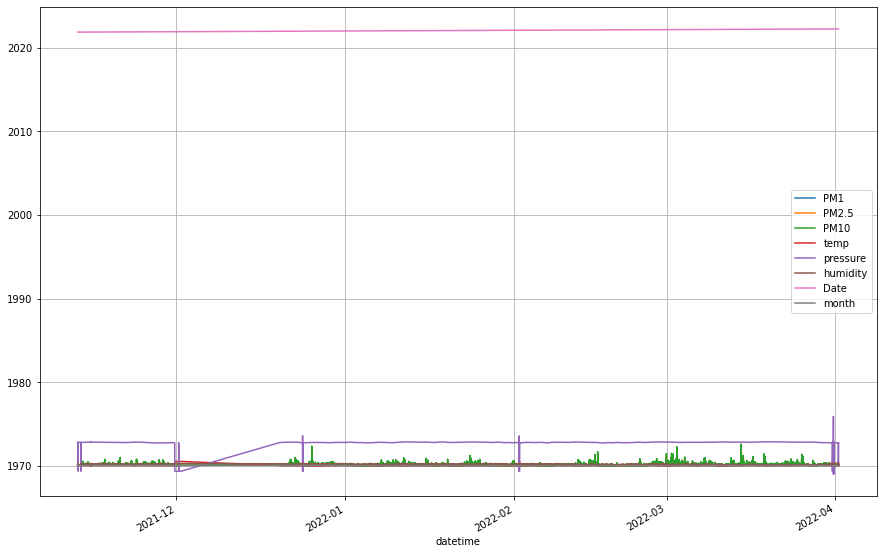

In [96]:
air_pollution_with_month_pop = air_pollution_with_month.set_index("datetime").plot()